In [27]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import log_loss
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv('nba-players.csv')
df.head()

,Unnamed: 0,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [13]:
df.columns

Index(['Unnamed: 0', 'name', 'gp', 'min', 'pts', 'fgm', 'fga', 'fg', '3p_made',
       '3pa', '3p', 'ftm', 'fta', 'ft', 'oreb', 'dreb', 'reb', 'ast', 'stl',
       'blk', 'tov', 'target_5yrs'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1340 non-null   int64  
 1   name         1340 non-null   object 
 2   gp           1340 non-null   int64  
 3   min          1340 non-null   float64
 4   pts          1340 non-null   float64
 5   fgm          1340 non-null   float64
 6   fga          1340 non-null   float64
 7   fg           1340 non-null   float64
 8   3p_made      1340 non-null   float64
 9   3pa          1340 non-null   float64
 10  3p           1340 non-null   float64
 11  ftm          1340 non-null   float64
 12  fta          1340 non-null   float64
 13  ft           1340 non-null   float64
 14  oreb         1340 non-null   float64
 15  dreb         1340 non-null   float64
 16  reb          1340 non-null   float64
 17  ast          1340 non-null   float64
 18  stl          1340 non-null   float64
 19  blk   

In [16]:
df['target_5yrs'].value_counts()

1    831
0    509
Name: target_5yrs, dtype: int64

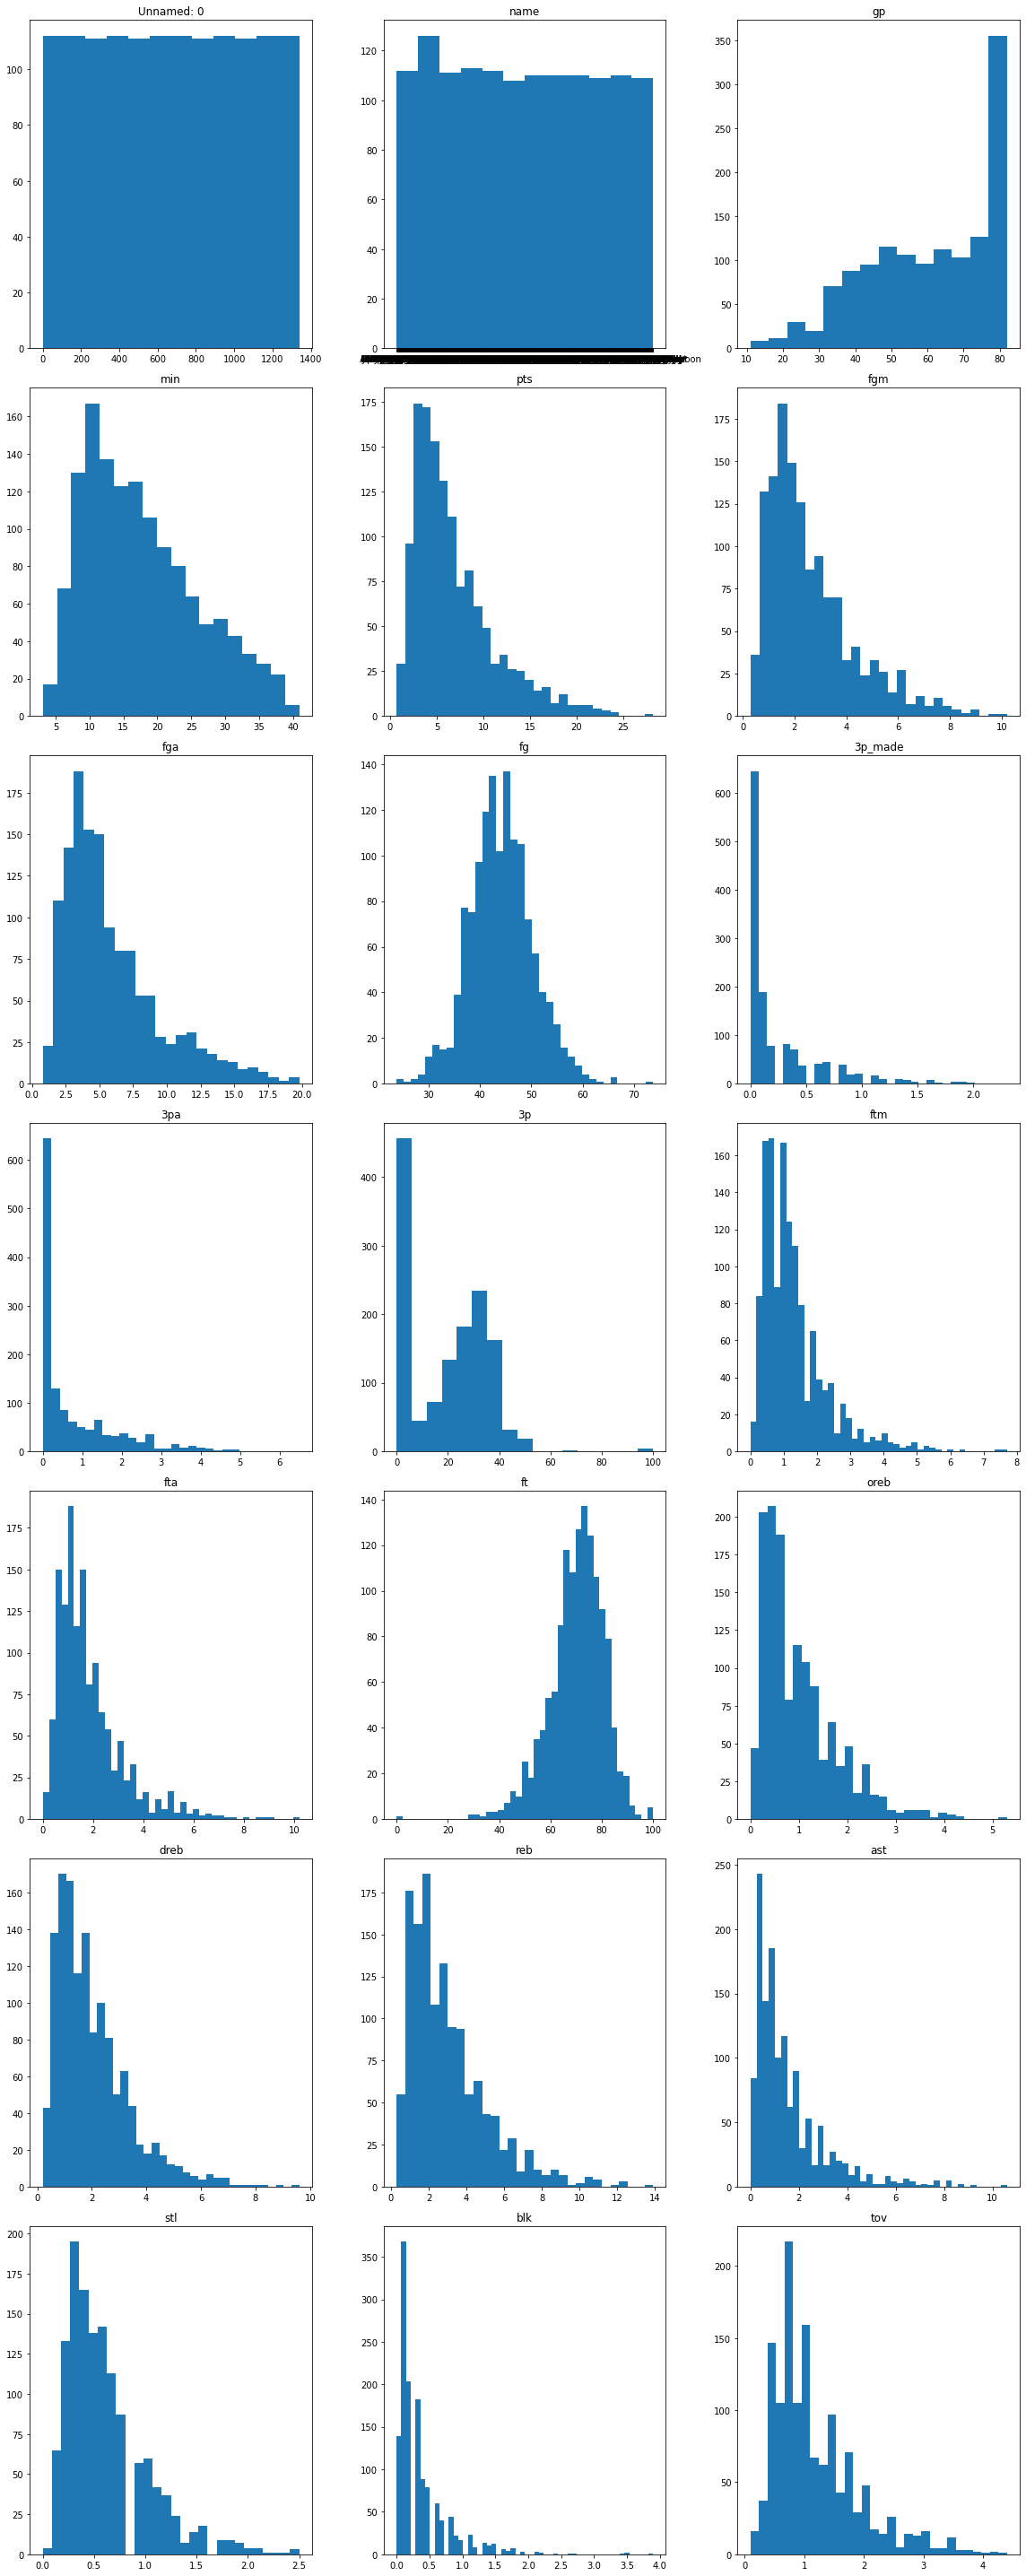

In [31]:
fig, axes = plt.subplots(nrows=(df.shape[1] // 3), ncols=3, figsize=(16,40))

columns = df.columns

for col, ax in zip(columns, axes.flatten()):
    ax.hist(df[col].dropna(), bins='auto')
    ax.set_title(col)
    
fig.tight_layout()

In [17]:
y = df.pop('target_5yrs')
X = df.iloc[:, 2:-1]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=42))])

In [23]:
pipe_lr.fit(X_train, y_train)
pipe_lr.score(X_train, y_train)

0.7104477611940299

In [30]:
# Create the classifier, fit it on the training data and make predictions on the test set
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


# Calculate accuracy 
acc = accuracy_score(y_pred, y_test)*100
print('Accuracy is : {0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is : {0}'.format(round(roc_auc, 2)))

Accuracy is : 65.67164179104478

AUC is : 0.64


In [25]:
# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_train, y_train)

# Predict on training and test sets
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

[01:17:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 98.61%
Validation accuracy: 73.13%


C:\Users\chris\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [28]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}


grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

C:\Users\chris\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:18:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:18:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:18:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:18:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[01:18:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:18:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:18:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:18:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be